In [2]:
import pandas as pd
import os
import numpy as np
import re
import matplotlib.pyplot as plt
from statsmodels.stats.anova import AnovaRM
from scipy import stats

make functions to grab subject info and also walk through all files within our data folder and look for behavioral data csv files

In [3]:
# this function gets the subject and run from the file name of the behavioral data file 
def extract_subject_and_run(input_str):
    # Define the regex patterns
    subject_pattern = re.compile(r'SF\d+')
    run_pattern = re.compile(r'run\d+')

    # Search for the patterns in the string
    subject_match = subject_pattern.search(input_str)
    run_match = run_pattern.search(input_str)

    # Extract the matched strings
    subject_number = subject_match.group(0) if subject_match else None
    run_number = run_match.group(0) if run_match else None
    
    return subject_number, run_number

#this function makes a list of our behavioral data filepaths
def find_csv_files(root_folder):
    file_paths = []
    
    # Check if root_folder exists
    if not os.path.exists(root_folder):
        print(f"Error: {root_folder} does not exist!")
        return file_paths
    
    # Walk through root_folder
    for foldername, subfolders, filenames in os.walk(root_folder):
        for file in filenames:
            if file.endswith('.csv') and not file.startswith('.'):  # Avoid hidden files
                file_path = os.path.join(foldername, file)
                # print(f"Appending CSV file: {file_path}")
                file_paths.append(file_path)
    
    return file_paths

use the functions we just made, and create a raw data dataframe

In [4]:
# Specify the main folder
main_folder = '/Users/jinjiang-macair/Library/CloudStorage/Box-Box/CNRISpring24_StabFlexTeam/Data'

# Find .csv files recursively
file_paths = find_csv_files(main_folder)

# initialize empty dataframe to store raw data
raw_data = pd.DataFrame()

for filePath in file_paths:
    df = pd.read_csv(filePath)

    # Extract subject and run information
    subject, run = extract_subject_and_run(filePath)
    df['subject'] = subject
    df['run'] = run
    
    # Append the raw data to the raw data dataframe
    raw_data = pd.concat([raw_data, df])

raw_data

,stim,ITI,cuedTask,taskSequence,congruency,corrResp,blockType,trials.thisRepN,trials.thisTrialN,trials.thisN,...,date,expName,psychopyVersion,frameRate,frameDur,Unnamed: 39,subject,thisRow.t,notes,Unnamed: 41
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2023-06-09_15h26.28.663,stability_flexibility_tradeoff,2022.2.5,59.962859,0.016667,NaN,SF05,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2023-06-09_15h26.28.663,stability_flexibility_tradeoff,2022.2.5,59.962859,0.016667,NaN,SF05,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2023-06-09_15h26.28.663,stability_flexibility_tradeoff,2022.2.5,59.962859,0.016667,NaN,SF05,NaN,NaN,NaN
3,1.0,1.5,p,n,c,1.0,C,0.0,0.0,0.0,...,2023-06-09_15h26.28.663,stability_flexibility_tradeoff,2022.2.5,59.962859,0.016667,NaN,SF05,NaN,NaN,NaN
4,8.0,1.0,p,r,c,2.0,C,0.0,1.0,1.0,...,2023-06-09_15h26.28.663,stability_flexibility_tradeoff,2022.2.5,59.962859,0.016667,NaN,SF05,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,3.0,2.0,m,s,c,1.0,A,0.0,124.0,124.0,...,2024-02-06_13h27.38.199,stability_flexibility_tradeoff,2022.2.5,60.014031,0.016667,NaN,SF39,NaN,NaN,NaN
128,7.0,2.0,m,r,i,2.0,A,0.0,125.0,125.0,...,2024-02-06_13h27.38.199,stability_flexibility_tradeoff,2022.2.5,60.014031,0.016667,NaN,SF39,NaN,NaN,NaN
129,3.0,1.0,m,r,c,1.0,A,0.0,126.0,126.0,...,2024-02-06_13h27.38.199,stability_flexibility_tradeoff,2022.2.5,60.014031,0.016667,NaN,SF39,NaN,NaN,NaN
130,2.0,1.0,m,r,i,1.0,A,0.0,127.0,127.0,...,2024-02-06_13h27.38.199,stability_flexibility_tradeoff,2022.2.5,60.014031,0.016667,NaN,SF39,NaN,NaN,NaN


In [5]:
file_paths

['/Users/jinjiang-macair/Library/CloudStorage/Box-Box/CNRISpring24_StabFlexTeam/Data/20230609.SF05.SF05/Behavioral/SF05_stability_flexibility_tradeoff_run4_2023-06-09_15h26.28.663.csv',
 '/Users/jinjiang-macair/Library/CloudStorage/Box-Box/CNRISpring24_StabFlexTeam/Data/20230609.SF05.SF05/Behavioral/SF05_stability_flexibility_tradeoff_run3_2023-06-09_15h16.48.879.csv',
 '/Users/jinjiang-macair/Library/CloudStorage/Box-Box/CNRISpring24_StabFlexTeam/Data/20230609.SF05.SF05/Behavioral/SF05_stability_flexibility_tradeoff_run2_2023-06-09_15h05.35.381.csv',
 '/Users/jinjiang-macair/Library/CloudStorage/Box-Box/CNRISpring24_StabFlexTeam/Data/20230609.SF05.SF05/Behavioral/SF05_stability_flexibility_tradeoff_run1_2023-06-09_14h45.12.881.csv',
 '/Users/jinjiang-macair/Library/CloudStorage/Box-Box/CNRISpring24_StabFlexTeam/Data/20231006.SF21.SF21/Behavioral/SF21_stability_flexibility_tradeoff_run2_2023-10-06_14h09.04.530.csv',
 '/Users/jinjiang-macair/Library/CloudStorage/Box-Box/CNRISpring24_Sta

this is just to print out the column names

In [6]:
raw_data.columns.values.tolist()

['stim',
 'ITI',
 'cuedTask',
 'taskSequence',
 'congruency',
 'corrResp',
 'blockType',
 'trials.thisRepN',
 'trials.thisTrialN',
 'trials.thisN',
 'trials.thisIndex',
 'main2_start',
 'key_pressed',
 'key_RT',
 'routine_end',
 'scanner_start',
 'run',
 'fixation_start',
 'fixation_start_rel',
 'fixation_end_rel',
 'stimulus_start',
 'stimulus_start_rel',
 'stimulus_end_rel',
 'acc',
 'corrResp.1',
 'feedback_start',
 'feedback_start_rel',
 'feedback_end_rel',
 'blockType.1',
 'blockBreak_start',
 'blockBreak_start_rel',
 'blockBreak_end_rel',
 'Participant',
 'Run (1-4)',
 'date',
 'expName',
 'psychopyVersion',
 'frameRate',
 'frameDur',
 'Unnamed: 39',
 'subject',
 'thisRow.t',
 'notes',
 'Unnamed: 41']

now you get the average accuracy and reaction time for each subject :)  
here's the pandas documentation: https://pandas.pydata.org/pandas-docs/stable/index.html  
but also ask chatpgt and stackoverflow for help  
HINT: try the groupby function from pandas

get accuracy and rt

accuracy df is just all of the accurate trials

In [7]:
accuracy_df = (raw_data['acc'] == 1)

In [8]:
# Filter the rows where 'acc' is 1
correct_trials = raw_data[accuracy_df]

# Step 1: Overall average acc and key_RT for each subject
overall_avg_acc = raw_data.groupby('subject')['acc'].mean()
overall_avg_key_RT = correct_trials.groupby('subject')['key_RT'].mean() #only get RT on correct trials

# Convert each Series to a DataFrame
overall_avg_acc_df = overall_avg_acc.to_frame(name='acc')
overall_avg_key_RT_df = overall_avg_key_RT.to_frame(name='key_RT')

overall_avg = pd.concat([overall_avg_acc_df, overall_avg_key_RT_df], axis=1)

In [9]:
overall_avg

,acc,key_RT
subject,,
SF01,0.876953,0.775040
SF02,0.875000,0.917387
SF03,0.960938,0.769149
SF04,0.912109,0.873968
SF05,0.734375,0.924129
SF06,0.988281,0.814678
SF07,0.943359,0.893543
SF08,0.958984,0.819765
SF09,0.962891,0.780295


congruency effect

In [10]:
# Calculate the average RT for correct trials, grouped by subject and congruency
congruency_avg = correct_trials.groupby(['subject', 'congruency'])['key_RT'].mean()

# Unstack the congruency level of the index to get 'i' and 'c' as separate columns
congruency_avg_unstacked = congruency_avg.unstack()

In [11]:
congruency_avg

subject  congruency
SF01     c             0.725651
         i             0.833299
SF02     c             0.883324
         i             0.954634
SF03     c             0.695559
                         ...   
SF37     i             0.948813
SF39     c             0.959107
         i             0.934942
SF40     c             0.764731
         i             0.806893
Name: key_RT, Length: 76, dtype: float64

In [12]:
congruency_avg_unstacked

congruency,c,i
subject,,
SF01,0.725651,0.833299
SF02,0.883324,0.954634
SF03,0.695559,0.847050
SF04,0.833409,0.917219
SF05,0.882760,0.978777
SF06,0.775361,0.854622
SF07,0.836868,0.952859
SF08,0.770506,0.872558
SF09,0.730931,0.832758


In [13]:
 # Calculate the congruency effect as the difference between incongruent and congruent RTs
 # and add this column to our overall avg dataframe
overall_avg['congruency_effect'] = congruency_avg_unstacked['i'] - congruency_avg_unstacked['c']

# our overall avg dataframe now has a 'congruency_effect' column for each subject
overall_avg

,acc,key_RT,congruency_effect
subject,,,
SF01,0.876953,0.775040,0.107648
SF02,0.875000,0.917387,0.071311
SF03,0.960938,0.769149,0.151491
SF04,0.912109,0.873968,0.083810
SF05,0.734375,0.924129,0.096017
SF06,0.988281,0.814678,0.079261
SF07,0.943359,0.893543,0.115991
SF08,0.958984,0.819765,0.102053
SF09,0.962891,0.780295,0.101826


### get listwide proportion congruent effect
first get the avg rt for each block type for both incongruent and incongruent  

block proportions:  
A: 0.25 congruent, 0.25 switch.  
B: 0.25 congruent, 0.75 switch.  
C: 0.75 congruent, 0.25 switch.  
D: 0.75 congruent, 0.75 switch.  

In [14]:
# Step 3: LWPC effect
# Group the data and then unstack
congruency_and_block_type = correct_trials.groupby(['subject', 'blockType', 'congruency'])['key_RT'].mean()
congruency_and_block_type_unstacked = congruency_and_block_type.unstack(level=['blockType', 'congruency']) #this df has RT by block type and congruency, can use for plotting the block types against each other for congruency

In [15]:
congruency_and_block_type

subject  blockType  congruency
SF01     A          c             0.744833
                    i             0.812455
         B          c             0.825798
                    i             0.887126
         C          c             0.663771
                                    ...   
SF40     B          i             0.815193
         C          c             0.750663
                    i             0.791934
         D          c             0.773234
                    i             0.792327
Name: key_RT, Length: 304, dtype: float64

In [16]:
congruency_and_block_type_unstacked

blockType          A                   B                   C            \
congruency         c         i         c         i         c         i   
subject                                                                  
SF01        0.744833  0.812455  0.825798  0.887126  0.663771  0.747537   
SF02        0.895200  0.941414  0.916627  0.967559  0.845152  0.902734   
SF03        0.684137  0.837116  0.712594  0.821194  0.658829  0.873606   
SF04        0.828355  0.898364  0.929970  0.930391  0.795794  0.904905   
SF05        0.860924  0.980014  0.958929  0.996739  0.862242  0.944501   
SF06        0.849410  0.825586  0.772321  0.888333  0.770320  0.849756   
SF07        0.869958  0.953604  0.975295  0.961167  0.774597  0.935221   
SF08        0.821860  0.827629  0.841475  0.893882  0.748619  0.904992   
SF09        0.762968  0.812676  0.791063  0.860154  0.711162  0.777816   
SF10        0.802838  0.855362  0.905449  0.912434  0.820300  0.824532   
SF11        0.793387  0.913893  0.971952  1.027159  0.834688  1.004975   
SF12        0.834677  0.917829  0.832339  0.930832  0.811250  0.872861   
SF13        0.857477  0.872193  0.905149  0.951612  0.837222  0.950336   
SF14        0.758855  0.887970  0.893188  0.955493  0.766080  0.958027   
SF15        0.804244  0.875284  0.841485  0.945403  0.824159  1.001732   
SF16        0.831249  0.845452  0.836496  0.893386  0.816088  0.885310   
SF17        0.650928  0.552788  0.567712  0.577287  0.615722  0.572970   
SF18        0.781990  0.860988  0.967848  0.982714  0.802774  0.887138   
SF19        0.860465  0.932065  0.953983  1.011368  0.879990  0.920064   
SF20        0.926882  0.994065  0.990771  1.063600  0.871385  1.009965   
SF21        0.866893  0.905783  0.948880  1.082437  0.829002  0.884645   
SF22        0.863524  0.977924  0.893277  1.016839  0.819727  0.944119   
SF23        0.772840  0.818404  0.821019  0.871695  0.805173  0.769099   
SF24        0.934672  0.910938  0.973618  0.979702  0.781820  0.856970   
SF25        0.850755  0.913450  0.889668  0.945462  0.756762  1.005376   
SF26        0.777408  0.944633  0.754643  0.928592  0.683525  0.865075   
SF27        0.826674  0.944306  0.895732  0.970644  0.763109  0.926051   
SF28        0.652282  0.786679  0.757063  0.842283  0.658105  0.816103   
SF29        0.741124  0.765802  0.835744  0.836209  0.681434  0.751607   
SF30        0.858623  0.989789  0.985805  1.015530  0.900021  0.942656   
SF31        0.774299  0.827619  0.851567  0.938673  0.754182  0.918485   
SF32        0.908044  0.979147  0.999154  1.077897  0.945531  1.074136   
SF33        0.810350  0.856752  0.862971  0.884632  0.790184  0.831623   
SF34        0.644523  0.804634  0.632259  0.819445  0.649007  0.857791   
SF35        0.834898  0.945238  0.944992  1.027730  0.904504  1.052015   
SF37        0.833410  0.882521  0.875541  0.989743  0.796561  0.946724   
SF39        0.921120  0.884640  0.926384  0.960888  0.902943  0.968485   
SF40        0.750207  0.806297  0.789357  0.815193  0.750663  0.791934   

blockType          D            
congruency         c         i  
subject                         
SF01        0.746170  0.826215  
SF02        0.907385  1.017206  
SF03        0.729831  0.935863  
SF04        0.840577  0.952380  
SF05        0.888325  0.950173  
SF06        0.756701  0.844394  
SF07        0.841606  0.943581  
SF08        0.752165  0.916787  
SF09        0.721230  0.867585  
SF10        0.909195  0.994020  
SF11        0.797550  0.974646  
SF12        0.840289  0.860817  
SF13        0.946255  1.024896  
SF14        0.773148  0.925496  
SF15        0.863122  1.148950  
SF16        0.803831  0.877777  
SF17        0.527016  0.598258  
SF18        0.740645  0.965432  
SF19        0.887939  0.954110  
SF20        0.814104  1.043585  
SF21        0.930047  1.027152  
SF22        0.798775  0.946610  
SF23        0.887516  1.001635  
SF24        0.897544  0.935720  
SF25        0.764616  0.965086  
SF26        0.719291  0.932575  
SF27    

actually calculate lwpc effect

congruency effect in high congruency blocks - congruency effect in low congruency block  
1. blocks C and D are high congruency  
2. blocks A and B are low congruency  
3. So we can treat blocks C and D as one big high congruency block and blocks A and B as one big low congruency block  
4. Thus we can find the congruency effect for the combined high congruency block and subtract the congruency effect for the combined low congruency block  
(C_i + D_i - C_c - D_c) - (A_i + B_i - A_c - B_c)

In [50]:
incongruent_avg_high_con_blocks = congruency_and_block_type_unstacked['C']['i'] + congruency_and_block_type_unstacked['D']['i']
congruent_avg_high_con_blocks = congruency_and_block_type_unstacked['C']['c'] + congruency_and_block_type_unstacked['D']['c']
incongruent_avg_low_con_blocks = congruency_and_block_type_unstacked['A']['i'] + congruency_and_block_type_unstacked['B']['i']
congruent_avg_low_con_blocks = congruency_and_block_type_unstacked['A']['c'] + congruency_and_block_type_unstacked['B']['c']

# add in explicit congruency effect calculations for plotting later 3/29
congruency_effect_high_con_blocks = incongruent_avg_high_con_blocks - congruent_avg_high_con_blocks
congruency_effect_low_con_blocks = incongruent_avg_low_con_blocks - congruent_avg_low_con_blocks

overall_avg['lwpc_effect'] = congruency_effect_high_con_blocks - congruency_effect_low_con_blocks
overall_avg['highConCongruencyEffect'] = congruency_effect_high_con_blocks
overall_avg['lowConCongruencyEffect'] = congruency_effect_low_con_blocks


In [51]:
overall_avg

,acc,key_RT,congruency_effect,lwpc_effect,highConCongruencyEffect,lowConCongruencyEffect
subject,,,,,,
SF01,0.876953,0.775040,0.107648,0.034861,0.163811,0.128950
SF02,0.875000,0.917387,0.071311,0.070257,0.167403,0.097146
SF03,0.960938,0.769149,0.151491,0.159229,0.420809,0.261580
SF04,0.912109,0.873968,0.083810,0.150484,0.220914,0.070430
SF05,0.734375,0.924129,0.096017,-0.012793,0.144106,0.156900
SF06,0.988281,0.814678,0.079261,0.074941,0.167129,0.092188
SF07,0.943359,0.893543,0.115991,0.193081,0.262599,0.069519
SF08,0.958984,0.819765,0.102053,0.262820,0.320995,0.058176
SF09,0.962891,0.780295,0.101826,0.094210,0.213009,0.118799


get average and standard error across subjects

In [52]:
# Select only numeric columns from the DataFrame (basically skip the subjects column cuz its all strings and cant take the average of strings)
overall_avg_numeric = overall_avg.select_dtypes(include=[np.number])

# Calculate the mean across subjects for each numeric column
means = overall_avg_numeric.mean()

# Calculate the standard error of the mean (SEM) for each numeric column
sem = overall_avg_numeric.sem()

print("Means:\n", means)
print("\nStandard Errors:\n", sem)

Means:
 acc                        0.876285
key_RT                     0.854841
congruency_effect          0.096497
lwpc_effect                0.100008
highConCongruencyEffect    0.229806
lowConCongruencyEffect     0.129798
dtype: float64

Standard Errors:
 acc                        0.017599
key_RT                     0.012852
congruency_effect          0.008521
lwpc_effect                0.017255
highConCongruencyEffect    0.021531
lowConCongruencyEffect     0.014295
dtype: float64


stats

set up a dataframe where we have the average rt for each condition

In [42]:
correct_trials

,stim,ITI,cuedTask,taskSequence,congruency,corrResp,blockType,trials.thisRepN,trials.thisTrialN,trials.thisN,...,date,expName,psychopyVersion,frameRate,frameDur,Unnamed: 39,subject,thisRow.t,notes,Unnamed: 41
3,1.0,1.5,p,n,c,1.0,C,0.0,0.0,0.0,...,2023-06-09_15h26.28.663,stability_flexibility_tradeoff,2022.2.5,59.962859,0.016667,NaN,SF05,NaN,NaN,NaN
5,1.0,1.5,p,r,c,1.0,C,0.0,2.0,2.0,...,2023-06-09_15h26.28.663,stability_flexibility_tradeoff,2022.2.5,59.962859,0.016667,NaN,SF05,NaN,NaN,NaN
6,3.0,1.0,p,r,c,1.0,C,0.0,3.0,3.0,...,2023-06-09_15h26.28.663,stability_flexibility_tradeoff,2022.2.5,59.962859,0.016667,NaN,SF05,NaN,NaN,NaN
7,6.0,1.5,m,s,c,2.0,C,0.0,4.0,4.0,...,2023-06-09_15h26.28.663,stability_flexibility_tradeoff,2022.2.5,59.962859,0.016667,NaN,SF05,NaN,NaN,NaN
8,1.0,3.0,m,r,c,1.0,C,0.0,5.0,5.0,...,2023-06-09_15h26.28.663,stability_flexibility_tradeoff,2022.2.5,59.962859,0.016667,NaN,SF05,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2.0,1.5,p,r,i,2.0,A,0.0,122.0,122.0,...,2024-02-06_13h27.38.199,stability_flexibility_tradeoff,2022.2.5,60.014031,0.016667,NaN,SF39,NaN,NaN,NaN
126,6.0,1.0,p,r,c,2.0,A,0.0,123.0,123.0,...,2024-02-06_13h27.38.199,stability_flexibility_tradeoff,2022.2.5,60.014031,0.016667,NaN,SF39,NaN,NaN,NaN
127,3.0,2.0,m,s,c,1.0,A,0.0,124.0,124.0,...,2024-02-06_13h27.38.199,stability_flexibility_tradeoff,2022.2.5,60.014031,0.016667,NaN,SF39,NaN,NaN,NaN
128,7.0,2.0,m,r,i,2.0,A,0.0,125.0,125.0,...,2024-02-06_13h27.38.199,stability_flexibility_tradeoff,2022.2.5,60.014031,0.016667,NaN,SF39,NaN,NaN,NaN


In [30]:
all_conditions = correct_trials.groupby(['subject', 'blockType', 'congruency', 'taskSequence'])['key_RT'].mean()

taskSequence is n for the first trial of each block, because it doesn't have a preceding trial to use to determine if it's a switch or a repeat trial.

Thus, we want to remove the conditions where taskSequence is n. This is done in filtered_all_conditions.  

Then, reset the index to renumber the rows starting from 0 and convert the dataframe back to a default integer index. This flattens the dataframe and makes it easier to work with for stats. This is done in index_reset_filtered_all_conditions   

*We don't unstack here because that would still have the complex, nested structure but just columns instead of rows. You can try running unstacked_filtered_all_conditions to see the difference between unstacking and resetting the index here.



In [35]:
filtered_all_conditions = all_conditions[all_conditions.index.get_level_values('taskSequence') != 'n']
unstacked_filtered_all_conditions = filtered_all_conditions.unstack(level=['blockType', 'congruency', 'taskSequence'])
index_reset_filtered_all_conditions = filtered_all_conditions.reset_index()

In [36]:
all_conditions

subject  blockType  congruency  taskSequence
SF01     A          c           r               0.711037
                                s               0.885653
                    i           n               0.947206
                                r               0.767433
                                s               0.954647
                                                  ...   
SF40     D          c           n               1.144762
                                r               0.816823
                                s               0.745605
                    i           r               0.622523
                                s               0.877229
Name: key_RT, Length: 779, dtype: float64

In [38]:
filtered_all_conditions

subject  blockType  congruency  taskSequence
SF01     A          c           r               0.711037
                                s               0.885653
                    i           r               0.767433
                                s               0.954647
         B          c           r               0.682895
                                                  ...   
SF40     C          i           s               0.918678
         D          c           r               0.816823
                                s               0.745605
                    i           r               0.622523
                                s               0.877229
Name: key_RT, Length: 608, dtype: float64

In [39]:
unstacked_filtered_all_conditions

blockType            A                                       B            \
congruency           c                   i                   c             
taskSequence         r         s         r         s         r         s   
subject                                                                    
SF01          0.711037  0.885653  0.767433  0.954647  0.682895  0.858638   
SF02          0.876096  0.951606  0.929311  0.978299  0.845147  0.946307   
SF03          0.672339  0.706521  0.826061  0.864879  0.815362  0.670552   
SF04          0.788786  0.942115  0.896525  0.910717  0.824175  0.975311   
SF05          0.854037  0.877647  0.950846  1.118558  0.898600  0.957680   
SF06          0.818508  0.887538  0.804300  0.889811  0.885203  0.739882   
SF07          0.849852  0.904685  0.943010  0.980065  0.957769  0.984475   
SF08          0.785748  0.950830  0.791601  0.928751  0.809162  0.842176   
SF09          0.717815  0.925272  0.794333  0.868013  0.758338  0.795398   
SF10          0.785861  0.887622  0.807503  1.015409  0.886760  0.914349   
SF11          0.756951  0.897256  0.876316  1.095999  0.844467  1.004954   
SF12          0.816669  0.924718  0.853461  1.084453  0.790263  0.845145   
SF13          0.825404  0.990236  0.827230  0.998451  0.792813  0.940739   
SF14          0.730106  0.823535  0.830531  1.121553  0.822200  0.933119   
SF15          0.780014  0.885084  0.849989  0.973957  0.882756  0.812007   
SF16          0.799931  0.990664  0.824334  0.916198  0.829295  0.839582   
SF17          0.628568  0.751550  0.534439  0.599569  0.434742  0.608626   
SF18          0.752119  0.895502  0.838835  0.927785  0.841521  0.992142   
SF19          0.843801  0.906290  0.918448  1.025186  1.028158  0.941201   
SF20          0.871752  1.053263  0.966342  1.088016  0.964467  1.011813   
SF21          0.792813  1.047977  0.870632  1.026776  0.884595  0.966895   
SF22          0.849156  0.906628  0.928650  1.142168  0.912385  0.890093   
SF23          0.753728  0.835637  0.787597  0.914086  0.719794  0.850543   
SF24          0.892427  1.010711  0.881779  1.044315  0.918051  0.992141   
SF25          0.848193  0.864077  0.901516  0.954556  0.883611  0.898473   
SF26          0.822394  0.588467  0.898104  1.086953  0.759661  0.753389   
SF27          0.786935  0.910126  0.909140  1.073973  0.718942  0.944641   
SF28          0.650040  0.578592  0.765387  0.828252  0.893401  0.712898   
SF29          0.715912  0.802754  0.744221  0.853639  0.872719  0.817257   
SF30          0.823596  1.017914  0.916107  1.213627  0.906808  1.030242   
SF31          0.732321  0.894775  0.811344  0.883769  0.997996  0.788473   
SF32          0.898045  0.956038  0.969189  1.003098  1.005692  0.994971   
SF33          0.780929  0.898615  0.835812  0.925706  0.770396  0.873489   
SF34          0.636363  0.678526  0.781093  0.887563  0.597526  0.640595   
SF35          0.789186  0.926322  0.930304  0.980683  0.950190  0.943101   
SF37          0.779540  1.025803  0.833917  1.028193  0.801097  0.903900   
SF39          0.920113  0.915421  0.854653  1.006255  0.910923  0.930095   
SF40          0.743747  0.841187  0.771153  0.936960  0.674814  0.804977   

blockType                                C                                \
congruency           i                   c                   i             
taskSequence         r         s         r         s         r         s   
subject                                                                    
SF01          0.801966  0.917285  0.642792  0.714120  0.741006  0.773663   
SF02          0.947281  0.974318  0.816786  0.946594  0.874316  0.997460   
SF03          0.809096  0.811489  0.659931  0.647968  0.816656  1.023099   
SF04          0.917294  0.935439  0.787006  0.824680  0.910892  0.887800   
SF05          0.888735  1.042640  0.841510  0.921420  0.896325  1.064943   
SF06          0.864181  0.896959  0.756788  0.791602  0.852265  0.839719   
SF07          0.992561  0.943543  0.774471  0.7

In [41]:
index_reset_filtered_all_conditions

,subject,blockType,congruency,taskSequence,key_RT
0,SF01,A,c,r,0.711037
1,SF01,A,c,s,0.885653
2,SF01,A,i,r,0.767433
3,SF01,A,i,s,0.954647
4,SF01,B,c,r,0.682895
...,...,...,...,...,...
603,SF40,C,i,s,0.918678
604,SF40,D,c,r,0.816823
605,SF40,D,c,s,0.745605
606,SF40,D,i,r,0.622523


I'm going to add in congruencyProportion and switchProportion based on the blockType so that we can see their interactions with congruency and taskSequence directly in our ANOVA.  

1. We create two dictionaries (congruency_proportions and switch_proportions) that serve as a lookup for what values to assign to each blockType.  
2. The .map() function is then called on the blockType column of index_reset_filtered_all_conditions, using these dictionaries to create the congruencyProportion and switchProportion columns. Each blockType value is looked up in the respective dictionary, and the corresponding proportion value is assigned to the new column in the same row.

In [43]:
# Dictionary to map blockType to congruencyProportion
congruency_proportions = {
    'A': 0.25,
    'B': 0.25,
    'C': 0.75,
    'D': 0.75
}

# Dictionary to map blockType to switchProportion
switch_proportions = {
    'A': 0.25,
    'B': 0.75,
    'C': 0.25,
    'D': 0.75
}

# Use the map function to create new columns based on blockType
index_reset_filtered_all_conditions['congruencyProportion'] = index_reset_filtered_all_conditions['blockType'].map(congruency_proportions)
index_reset_filtered_all_conditions['switchProportion'] = index_reset_filtered_all_conditions['blockType'].map(switch_proportions)

index_reset_filtered_all_conditions

,subject,blockType,congruency,taskSequence,key_RT,congruencyProportion,switchProportion
0,SF01,A,c,r,0.711037,0.25,0.25
1,SF01,A,c,s,0.885653,0.25,0.25
2,SF01,A,i,r,0.767433,0.25,0.25
3,SF01,A,i,s,0.954647,0.25,0.25
4,SF01,B,c,r,0.682895,0.25,0.75
...,...,...,...,...,...,...,...
603,SF40,C,i,s,0.918678,0.75,0.25
604,SF40,D,c,r,0.816823,0.75,0.75
605,SF40,D,c,s,0.745605,0.75,0.75
606,SF40,D,i,r,0.622523,0.75,0.75


Okay now that we have all of our columns, we can finally run our anova!  

We will do a repeated measures anova on our four effects of interest (congruency, taskSequence, congruencyProportion, switchProportion). We are using repeated measures, because we have a bunch of trials for each subject (repeated measures). This lets us account for within-subject variability, and thus reduce the error variance associated with individual differences, more than a regular anova would.

Our dependent variable is our reaction time (depvar='key_RT'). We also have to tell it which column is the subject identifier column (subject='subject'), so that the repeated measures ANOVA knows which trials belong to the same subject across different conditions.

Our four effects of interest are our within-subject factors (within=['congruency', 'taskSequence', 'congruencyProportion', 'switchProportion']). The ANOVA tests for the effects of these factors and their interactions on the dependent variable (key_RT).  

How to interpret:  

**F-value**: This statistic represents the ratio of the variance explained by a factor to the variance not explained by it, essentially comparing the between-group variability to the within-group variability. A higher F-value indicates a greater degree of variance explained by the factor, suggesting a stronger effect.  

**P-value**: Indicates the probability of observing the data, or something more extreme, under the null hypothesis (which typically states there is no effect or difference). A small p-value (typically <0.05) suggests that the observed data are unlikely under the null hypothesis, leading to its rejection in favor of the alternative hypothesis that there is a significant effect or difference.  

**Main Effects**: We have four within-subject factors, each has a main effect result. A significant main effect for a factor means that there are significant differences in the dependent variable across the levels of this factor, averaged over the levels of other factors. We expect to see significant main effects for congruency and taskSequence.

**Interactions**: An interaction effect between factors indicates that the effect of one factor depends on the level of another factor. These are denoted using colons. Significant interactions suggest that it's not sufficient to consider the factors independently; the combination of factors influences the dependent variable. Based on our hypotheses, we are expecting to see an interaction between congruency and congruencyProportion, and between taskSequence and switchProportion, but not between congruency and switchProportion, nor between taskSequence and congruencyProportion.  

Ignore Num DF and Den DF, those are used to calculate the F-value. Also, we'll just report p-values for your presentation.

In [46]:
# Perform Repeated Measures ANOVA
anova_results = AnovaRM(data=index_reset_filtered_all_conditions, depvar='key_RT', subject='subject', within=['congruency', 'taskSequence', 'congruencyProportion', 'switchProportion']).fit()

print(anova_results)

                                           Anova
                                                              F Value  Num DF  Den DF Pr > F
--------------------------------------------------------------------------------------------
congruency                                                    125.9624 1.0000 37.0000 0.0000
taskSequence                                                  103.6134 1.0000 37.0000 0.0000
congruencyProportion                                            5.7479 1.0000 37.0000 0.0217
switchProportion                                                2.8594 1.0000 37.0000 0.0992
congruency:taskSequence                                         1.4740 1.0000 37.0000 0.2324
congruency:congruencyProportion                                25.5687 1.0000 37.0000 0.0000
taskSequence:congruencyProportion                               2.8457 1.0000 37.0000 0.1000
congruency:switchProportion                                     0.0091 1.0000 37.0000 0.9244
taskSequence:switchPr

### plotting

This should make four subplots, comparing the congruency effect and switch cost between different congruency and switch proportions. I made one subplot as a demonstration. To make the others, you'll also need to calculate the congruency effect as a function of switch proportion and the switch cost as a function of congruency proportion.

In [54]:
means['highConCongruencyEffect']

0.2298056197158097

In [55]:
sem['highConCongruencyEffect']

0.021531152859468022

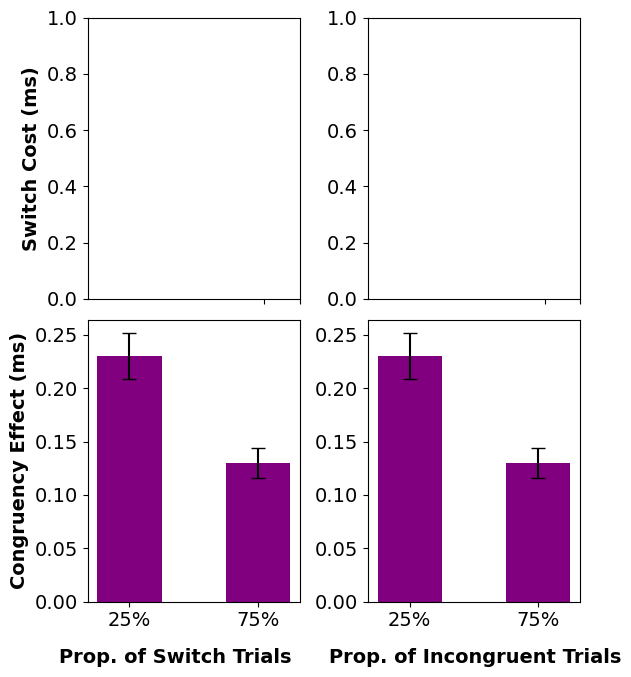

In [61]:
bar_width = 0.1
# Create a 2x2 subplot structure
fig, axs = plt.subplots(2, 2, figsize=(6, 8))  # Adjust the figure size as needed

# Set x-ticks and x-tick labels for each subplot
for ax in axs.flat:
    ax.set_xticks([1, 1.2])
    ax.set_xticklabels(['25%', '75%'], fontsize=14)
    ax.tick_params(axis='y', labelsize=14)
    
# this labels the axes
axs[0, 0].set_ylabel('Switch Cost (ms)', fontweight='bold', fontsize=14)
axs[1, 0].set_ylabel('Congruency Effect (ms)', fontweight='bold', fontsize=14)

# Plot for Congruency Effect - Incongruency Proportion
# the [1,1] is the location (bottom right) within the subplot structure that this subplot will be. [0,0] is top left.
axs[1, 1].bar([1, 1.2], [means['highConCongruencyEffect'], means['lowConCongruencyEffect']], 
              bar_width, yerr=[sem['highConCongruencyEffect'], sem['lowConCongruencyEffect']], capsize=5, color='purple')

# Plot for Switch Cost - Switch Proportion

# Plot for Congruency Effect - Switch Proportion

# Plot for Switch Cost - Incongruency Proportion

# this subplot is in the top right, so set axs[0,1].

# Remove x-tick labels from individual plots in the top row
for ax in axs[0]:
    ax.set_xticklabels([])

# # Set an overall title for the figure
# fig.suptitle('Combined Bar Plots: Switch Cost and Congruency Effect')

# Adjust the layout
plt.tight_layout()
plt.subplots_adjust(top=0.88, bottom=0.15)  # Adjust as needed

# Add column labels below the bottom row of plots
fig.text(0.3, 0.08, 'Prop. of Switch Trials', ha='center', va='center', fontweight='bold', fontsize=14)
fig.text(0.8, 0.08, 'Prop. of Incongruent Trials', ha='center', va='center', fontweight='bold', fontsize=14)


# Save the figure
plt.savefig('combined_bar_plots_fmri.png', bbox_inches='tight')

# Show the plot
plt.show()
